In [1]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.datasets import load_iris

In [3]:
df=load_iris()

In [4]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
import numpy as np
import pandas as pd

dff=pd.DataFrame()

In [15]:
dff['sepal length (cm)']=df.data[:,0]
dff['sepal width (cm)']=df.data[:,1]
dff['petal length (cm)']=df.data[:,2]
dff['petal width (cm)']=df.data[:,3]
dff['species']=df.target

In [16]:
dff

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
x=dff.iloc[:,:-1]
y=dff.iloc[:,-1:]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [20]:
model=RandomForestClassifier(n_estimators=100)

In [21]:
model.fit(x_train,y_train)

<ipython-input-21-4719cf73997a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier()

In [22]:
y_pred=model.predict(x_test)

In [27]:
f=pd.Series(model.feature_importances_,index=df.feature_names)

In [28]:
f

sepal length (cm)    0.111026
sepal width (cm)     0.026246
petal length (cm)    0.421599
petal width (cm)     0.441129
dtype: float64

<Axes: >

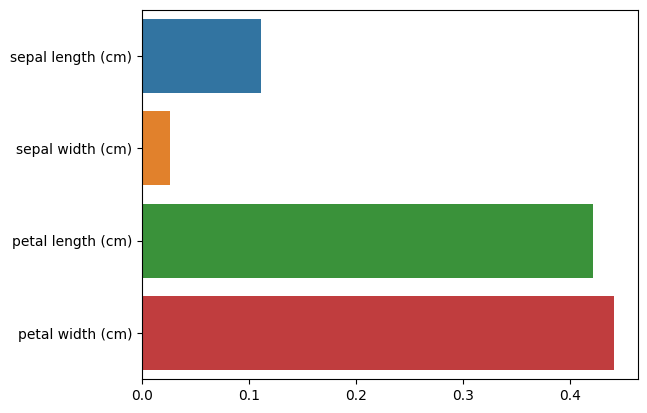

In [33]:
import seaborn as sns
sns.barplot(x=f,y=f.index)

In [34]:
from scipy.cluster.hierarchy import linkage,fcluster

In [35]:
dm=linkage(x,method='complete',metric='euclidean')

In [37]:
from scipy.cluster.hierarchy import dendrogram

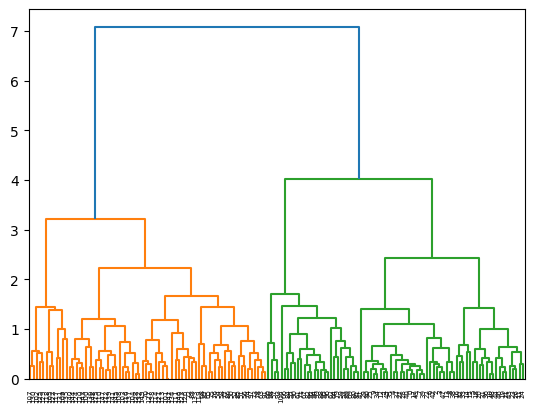

In [38]:
d=dendrogram(dm)

In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
feature=dff.iloc[:,:-1]

In [42]:
s=StandardScaler()

In [43]:
f=s.fit_transform(feature)

In [44]:
from sklearn.cluster import DBSCAN

In [47]:
m1=DBSCAN(eps=0.5,min_samples=4)

In [50]:
dff['cluster']=m1.fit_predict(f)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

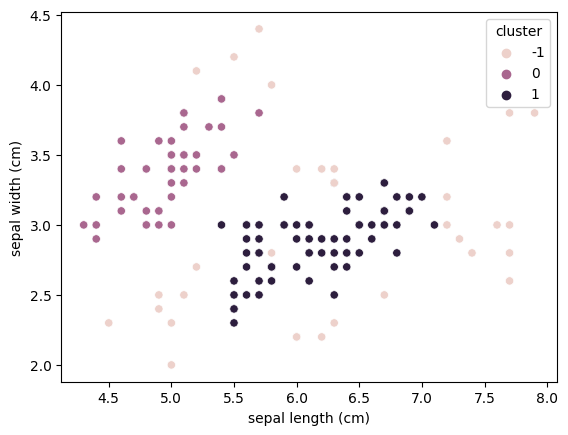

In [52]:
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue='cluster',data=dff)